In [6]:
source("C:/Users/Tom Work/PycharmProjects/twipsy-lite/ts.R")

In [144]:
sept_total = preprocessing('E:/summary/sept_total.csv', 'E:/summary/sept_total.csv')$total[9:680]

 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


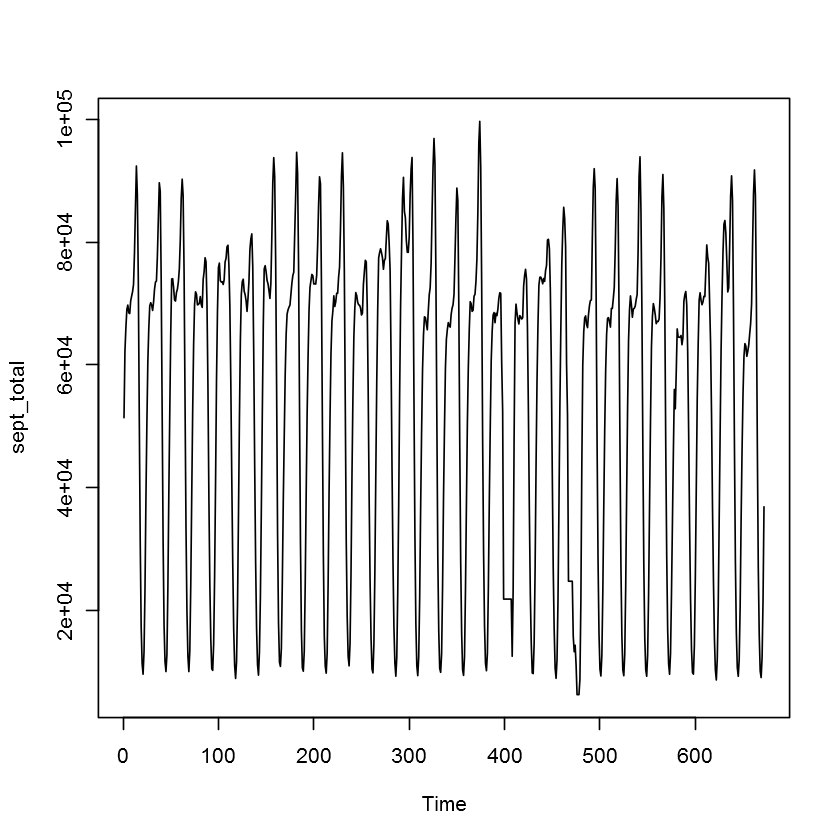

In [145]:
plot.ts(sept_total)

In [2]:
sept_s = stationary(sept())

 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


In [3]:
june_s = stationary(june())

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [91]:
sept_days = split_by_day(sept_s)
june_days = split_by_day(june_s)

In [125]:
colnames(sept_days) = c(7:27)

In [129]:
colnames(june_days) = c(108:128)

In [130]:
combined = cbind(sept_days, june_days)

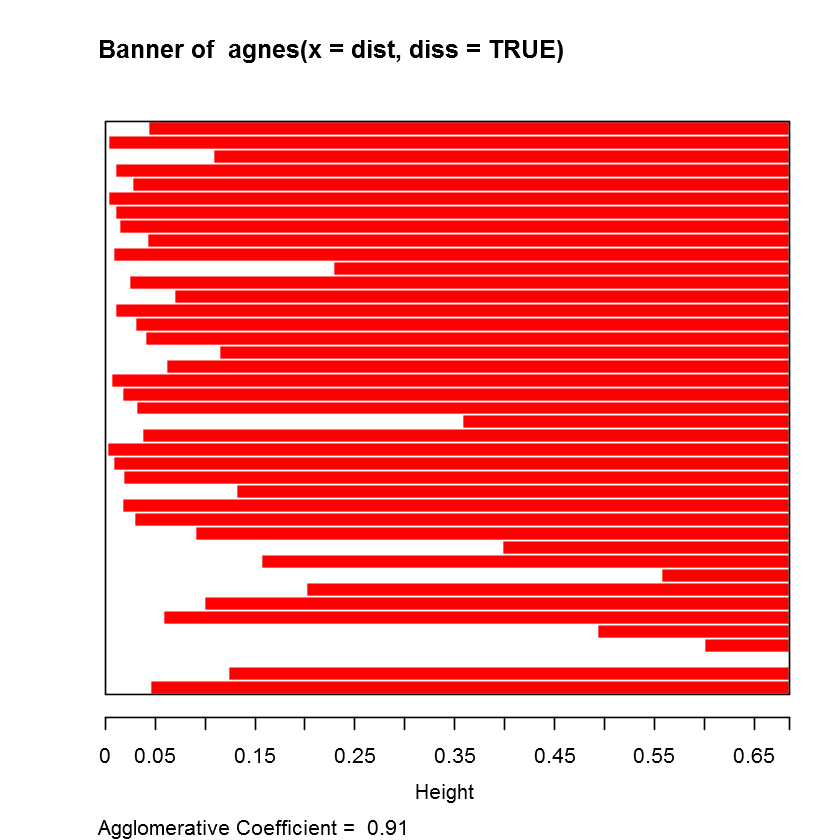

Medoids:
     ID        
[1,] "32" "118"
[2,] "10" "16" 
Clustering vector:
  7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26 
  1   1   2   2   1   2   2   1   2   2   1   2   1   1   1   1   2   2   2   2 
 27 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 
  2   1   1   1   1   2   2   1   1   1   1   1   2   1   2   1   1   1   2   2 
127 128 
  2   2 
Objective function:
    build      swap 
0.1997794 0.1687626 

Available components:
[1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
[6] "clusinfo"   "silinfo"    "diss"       "call"      

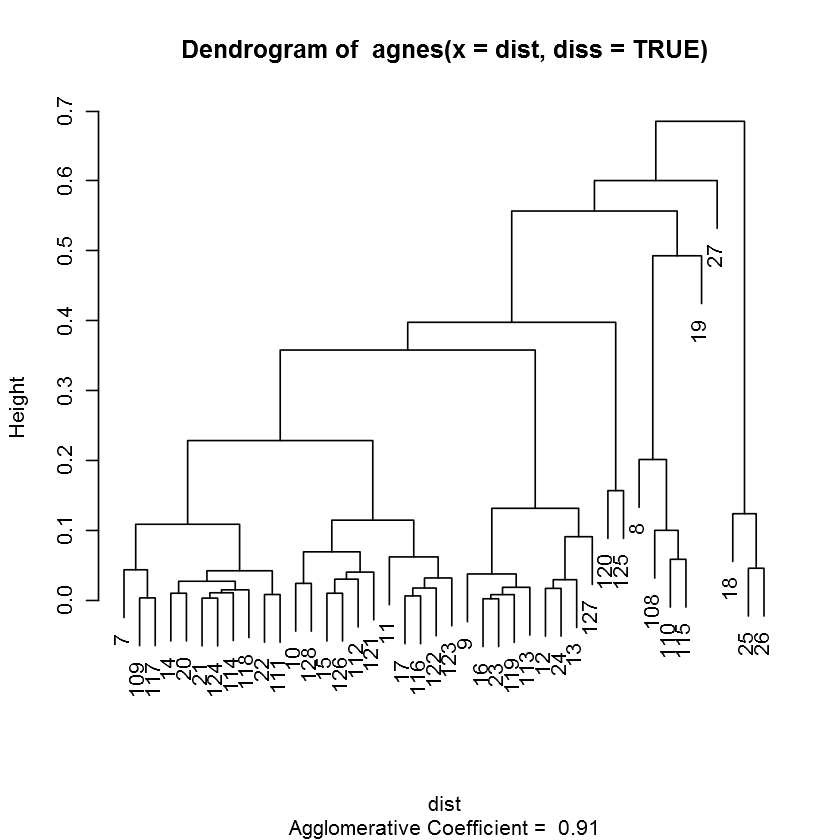

In [134]:
dist = diss(combined, METHOD='AR.PIC')
plot(agnes(dist, diss=TRUE))
pam(dist, 2, diss=TRUE)

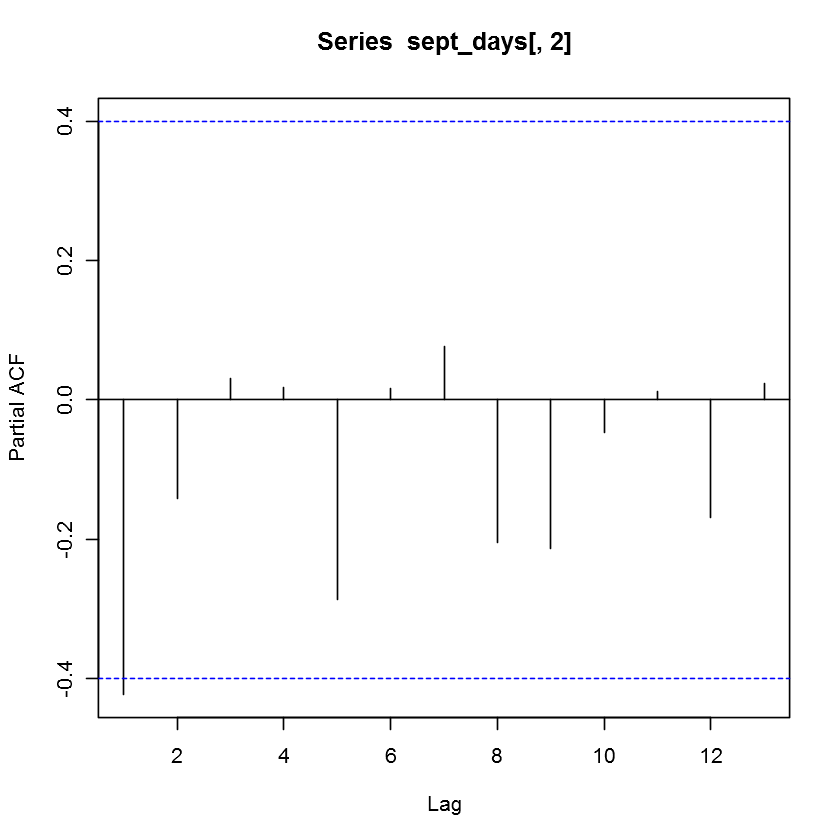

In [104]:
plot(pacf(sept_days[, 2]))

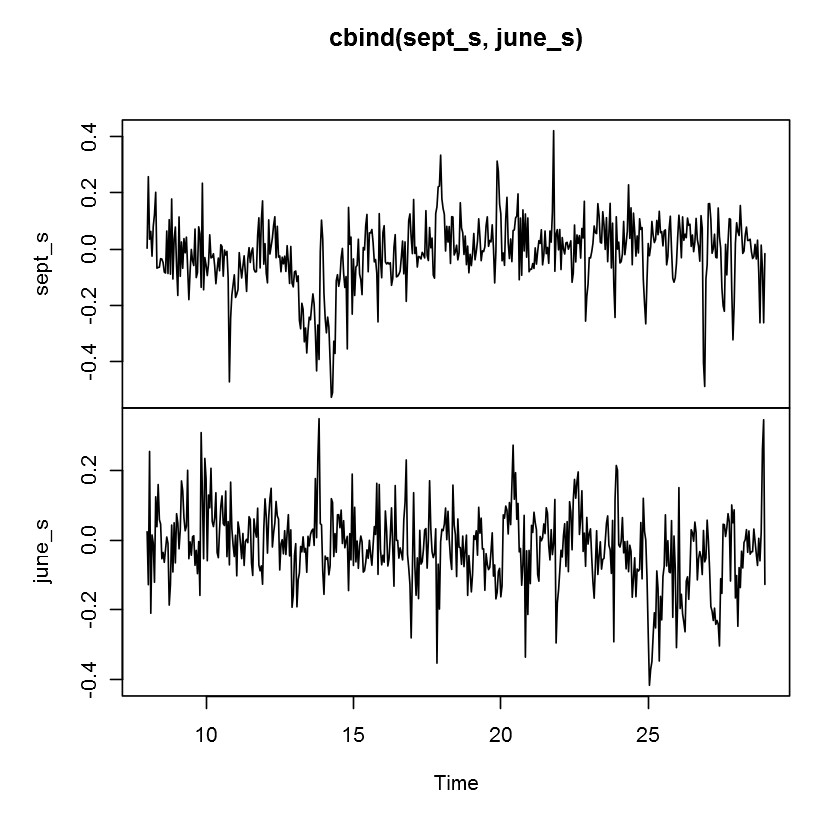

In [4]:
plot.ts(cbind(sept_s, june_s))

In [32]:
s = ts(sept_s, frequency=24)
j = ts(june_s, frequency=24)
s.1 = as.numeric(window(s, start=c(1, 1), end= c(7, 24)))
s.2 = as.numeric(window(s, start=c(8, 1), end= c(14, 24)))
s.3 = as.numeric(window(s, start=c(15, 1), end= c(21, 24)))
j.1 = as.numeric(window(j, start=c(1, 1), end= c(7, 24)))
j.2 = as.numeric(window(j, start=c(8, 1), end= c(14, 24)))
j.3 = as.numeric(window(j, start=c(15, 1), end= c(21, 24)))

In [33]:
weeks = data.frame(s.1, s.2, s.3, j.1, j.2, j.3)

In [89]:
plotacf <- function(x){
    plot(acf(x, lag.max=30))
    }

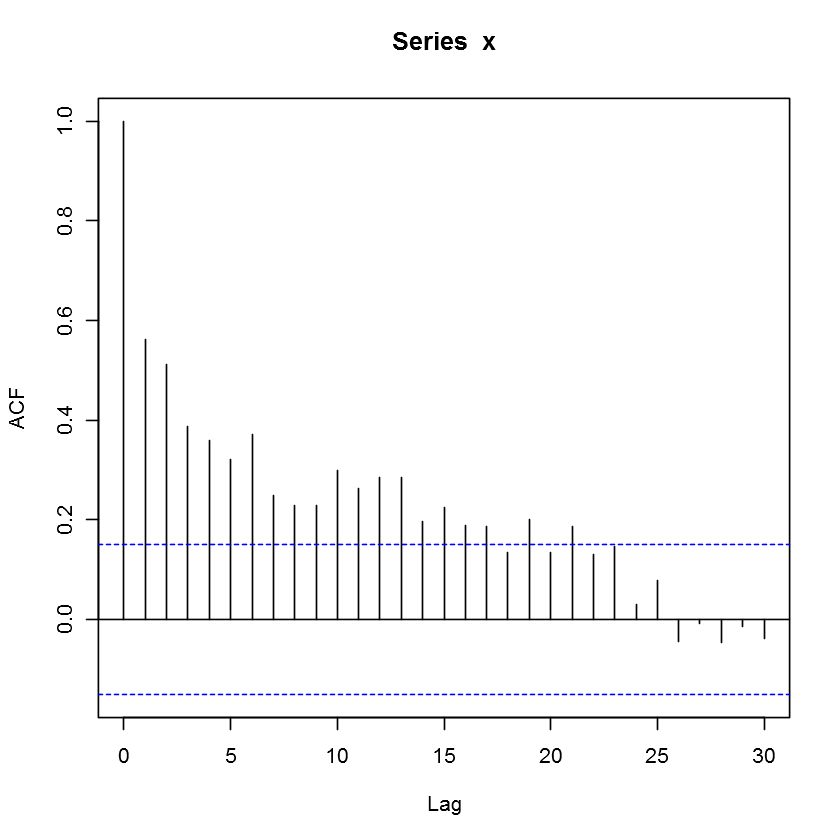

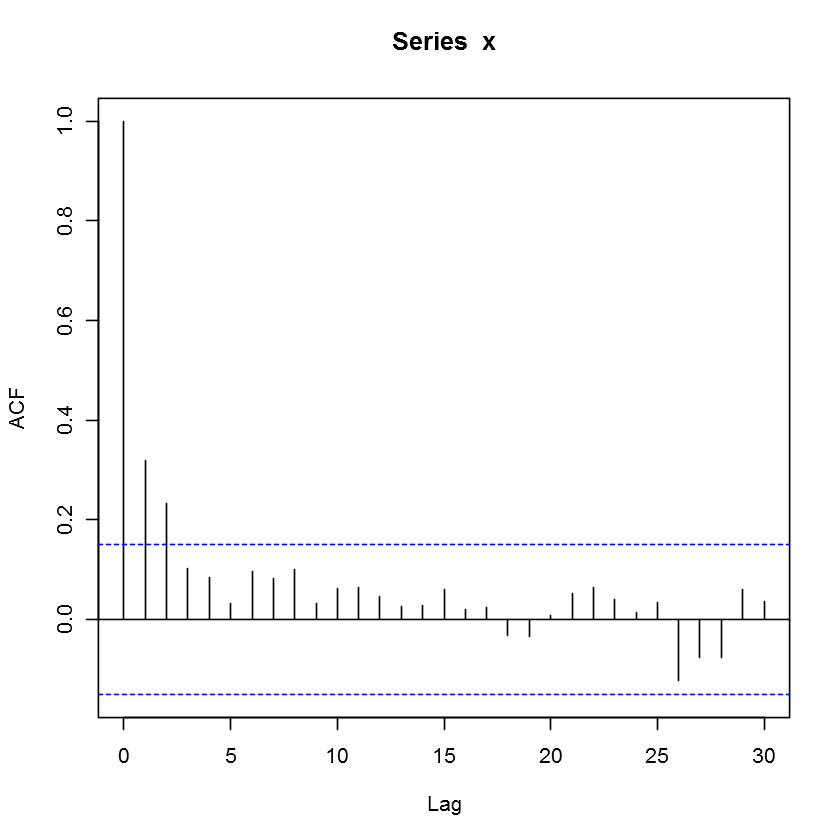

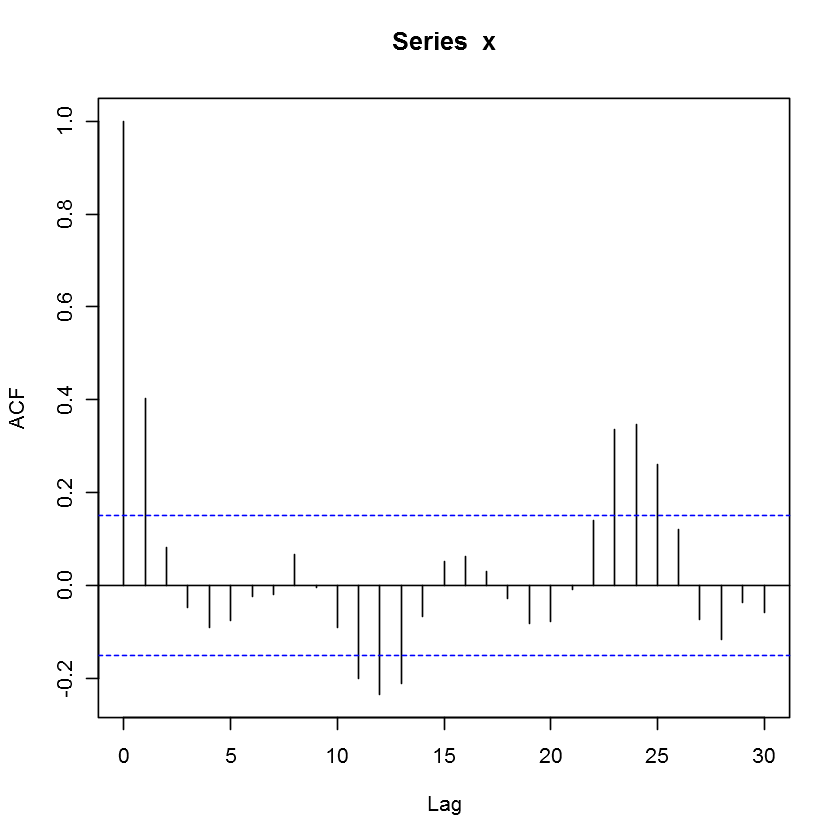

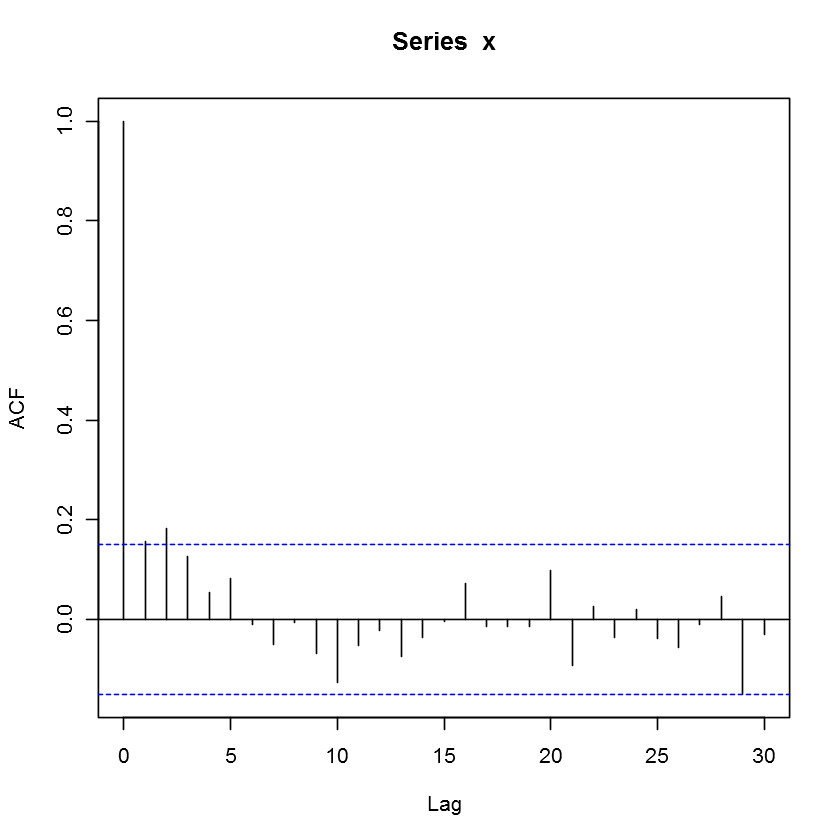

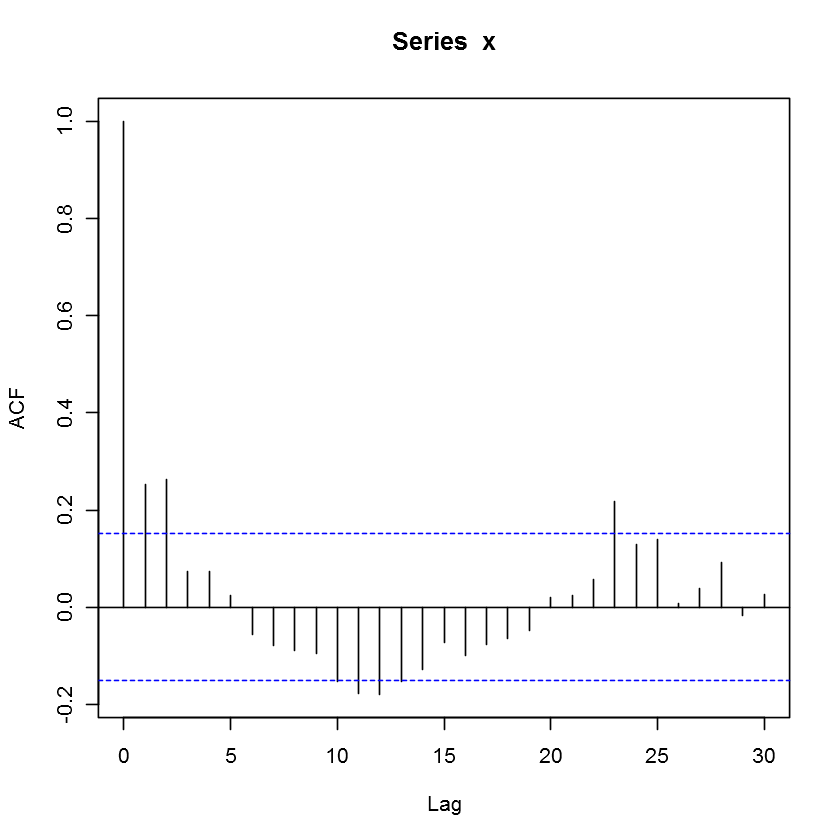

NULL

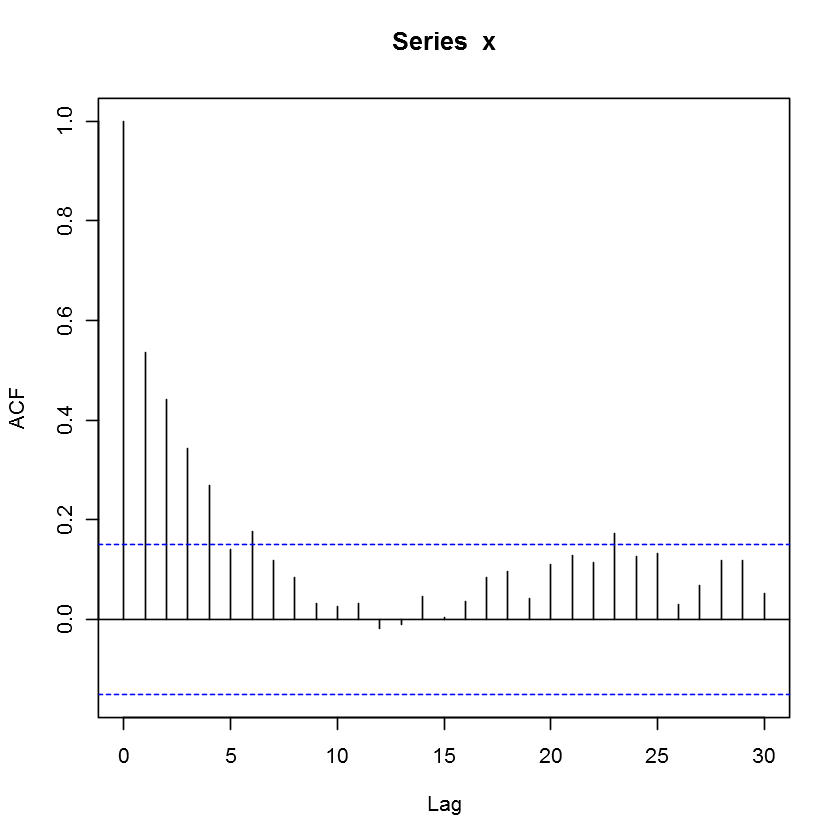

In [90]:
apply(weeks, MARGIN=2, FUN=plotacf)

In [70]:
s_ar


Call:
ar(x = s[169:(168 * 3)])

Coefficients:
     1  
0.3677  

Order selected 1  sigma^2 estimated as  0.009167

In [74]:
j_ar = ar(j[1:(168*3)])

In [73]:
auto.arima(j[1:168*3])

Series: j[1:168 * 3] 
ARIMA(2,1,1)                    

Coefficients:
         ar1      ar2      ma1
      0.2321  -0.0577  -0.9454
s.e.  0.0833   0.0825   0.0333

sigma^2 estimated as 0.01247:  log likelihood=129.68
AIC=-251.37   AICc=-251.12   BIC=-238.89

In [75]:
j_ar


Call:
ar(x = j[1:(168 * 3)])

Coefficients:
     1       2       3  
0.2745  0.2372  0.0647  

Order selected 3  sigma^2 estimated as  0.009432

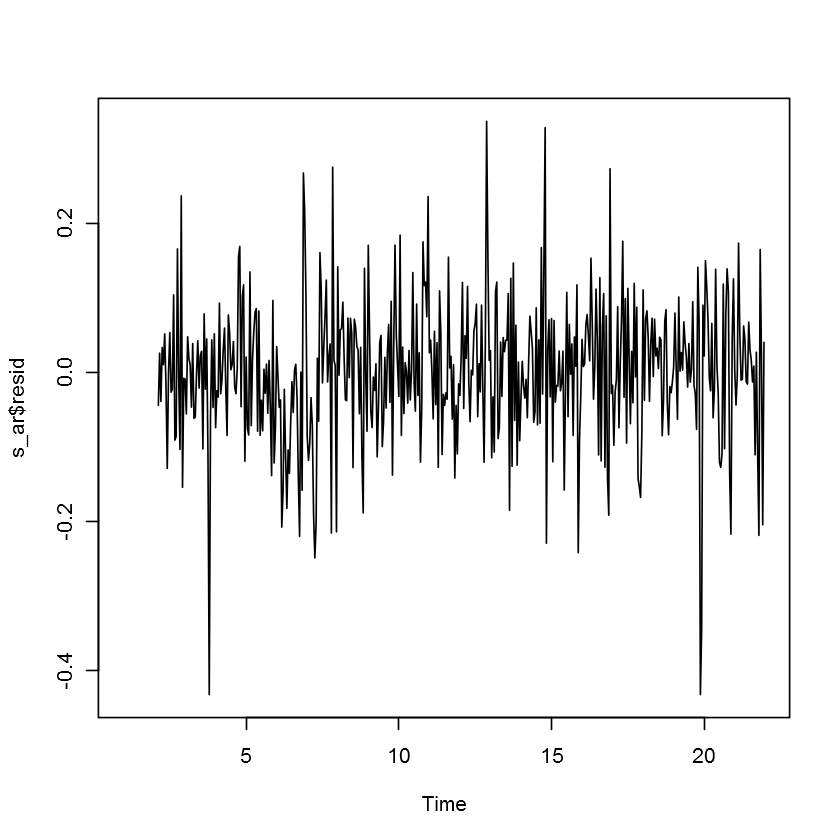

In [68]:
plot.ts(s_ar$resid)

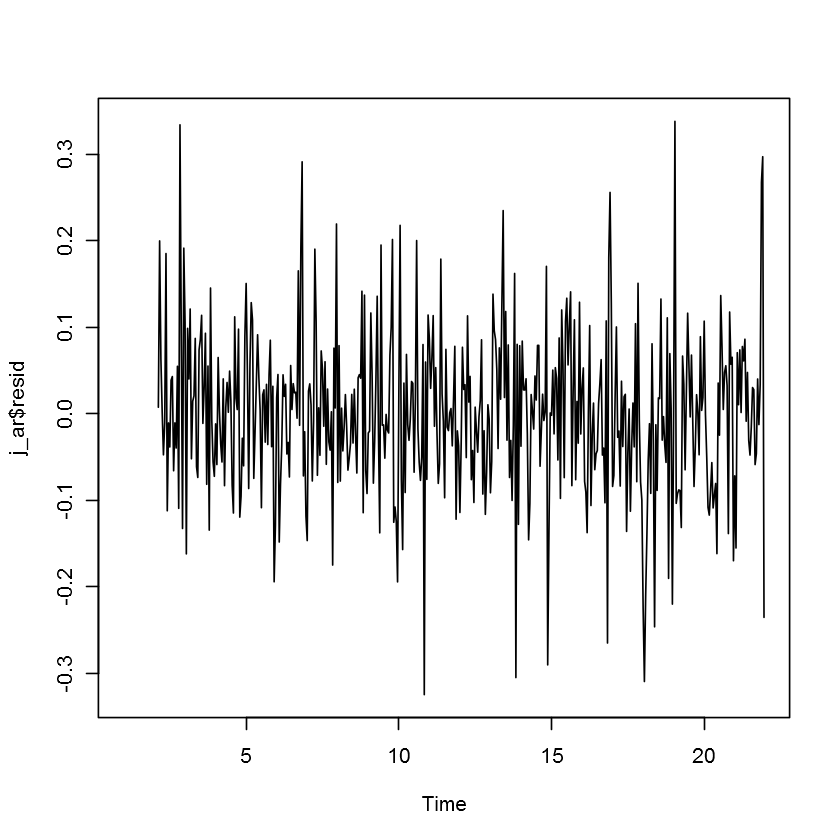

In [67]:
plot.ts(j_ar$resid)

In [57]:
s_ar


Call:
ar(x = s)

Coefficients:
      1        2        3        4        5        6        7        8  
 0.3828   0.1161   0.0183   0.0200   0.0098   0.1125  -0.0347   0.0586  
      9       10       11       12       13       14       15       16  
-0.0358   0.0735  -0.0268   0.0133   0.0129  -0.0054   0.0638  -0.0243  
     17       18       19       20       21       22       23       24  
 0.0592  -0.0537   0.0229  -0.0137   0.0486   0.0162   0.0926   0.0146  
     25       26       27  
 0.1113  -0.1582  -0.0784  

Order selected 27  sigma^2 estimated as  0.009857

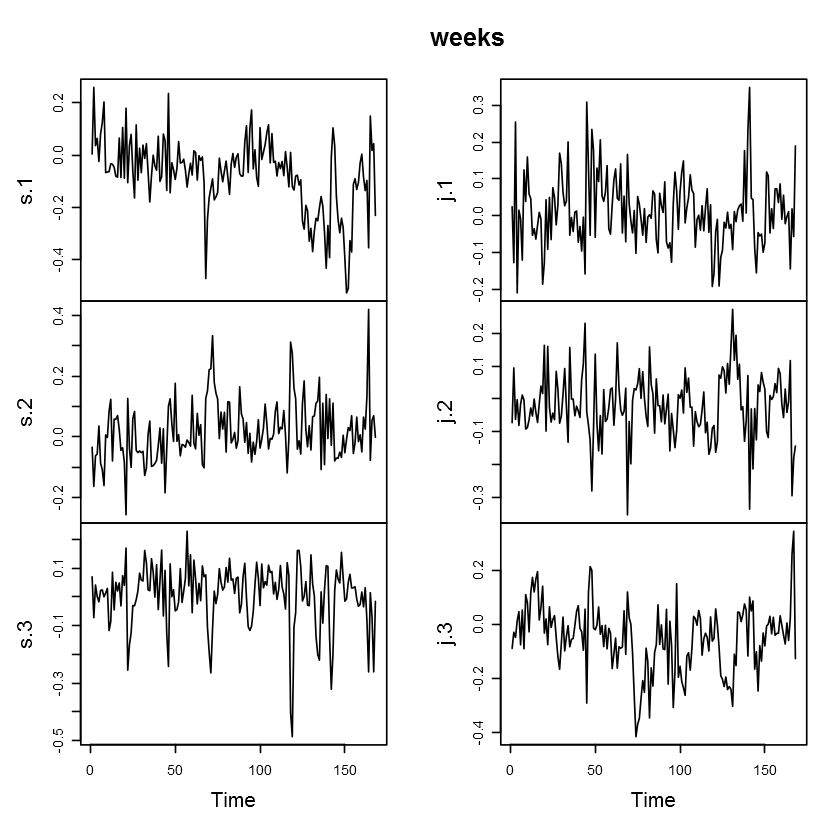

In [34]:
plot.ts(weeks)

In [5]:
sept_days = split_by_day(sept_s)

In [8]:
library(TSclust)

Loading required package: pdc
Loading required package: cluster


In [50]:
diss(weeks, METHOD='AR.PIC')

           s.1        s.2        s.3        j.1        j.2
s.2 0.18978861                                            
s.3 0.28571036 0.19634360                                 
j.1 0.29682490 0.14140915 0.31577902                      
j.2 0.21477422 0.09830871 0.29427911 0.08471786           
j.3 0.07063879 0.16273349 0.21785167 0.29250136 0.21948519